In [ ]:
%load_ext autoreload
%autoreload 2


In [88]:
# Import Libraries

# DS 
import os
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import seaborn as sns

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.neighbors import KNeighborsClassifier

# Aesthetic Plots
import mplcyberpunk
plt.style.use('cyberpunk')
%matplotlib inline

In [3]:
# Modules
from src.data_clean import *

In [4]:
# Helper Functions
def get_score(model, X, y) -> tuple:
    mse = np.mean(cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error)))
    r2 = np.mean(cross_val_score(model, X, y, scoring=make_scorer(r2_score)))
    acc = np.mean(cross_val_score(model, X, y, scoring="accuracy"))
    print(f"""{model.__class__.__name__}     Train CV | MSE: {mse} | R2: {r2} | Acc: {acc}""")
    return mse, r2, acc


# Create Basline Models

In [5]:
# Read and Clean CSV
churn = data_cleaner(pd.read_csv("data/churn_train.csv"))

In [6]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,target,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.000000,1.00,0.0,0.0,0.0,0.0,100.0,1.0,0.0,0.0,1.0,0.0
1,8.06,5.0,5.000000,1.00,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,21.50,4.0,4.601697,1.00,0.0,0.0,1.0,1.0,100.0,0.0,0.0,1.0,0.0,1.0
3,9.46,5.0,4.601697,2.75,0.0,100.0,1.0,0.0,100.0,0.0,0.0,1.0,1.0,0.0
4,13.77,5.0,4.601697,1.00,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.0,0.0,1.0


In [7]:
# Create X, y arrays from dataframe
X = churn
y = churn.pop("target")

In [8]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Decision Tree Classifier

## Random Forest Classifier

In [9]:
# Create Random Forest Model
model_rf = RandomForestClassifier(
                            oob_score=True,
                            max_features=3,
)

In [10]:
# Fit Data
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

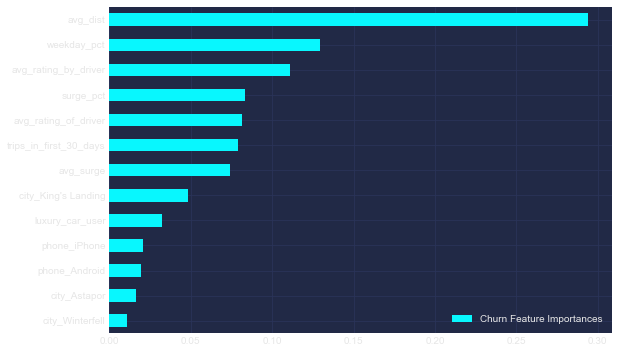

In [11]:
# Feature Importances

# See and plot feature importances 
feat_scores = pd.DataFrame({'Churn Feature Importances' : model_rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn Feature Importances')
feat_scores.plot(kind='barh', figsize=(9, 6))

In [12]:
# Out of Bag Error
model_rf.oob_score_

0.7576666666666667

In [84]:
# Prediciton
# model_rf.predict(X)

#### Random Forest Performance

In [31]:
# get_score(model_rf, X_train, y_train)

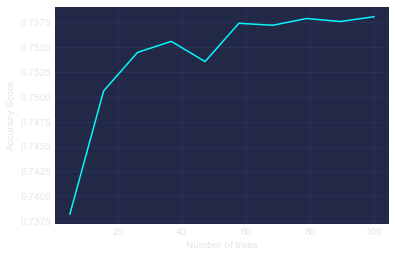

In [33]:
num_trees = np.linspace(5, 100, 10)
fig, ax = plt.subplots()
ax.set_xlabel('Number of trees')
ax.set_ylabel('Accuracy Score')
accuracy = []
for n in num_trees:
    total = 0
    for i in range(5):
        model_rf = RandomForestClassifier(n_estimators=int(n))
        model_rf.fit(X_train,y_train)
        yhat = model_rf.predict(X_test)
        total += model_rf.score(X_test, y_test)
    accuracy.append(total/5)

    
ax.plot(num_trees, accuracy)

In [35]:
len(X_train.columns)
x = range(1,len(X_train.columns) + 1)
accuracy = []
for n in x:
    total = 0
    for i in range(5):
        model = RandomForestClassifier(max_features=n)
        model.fit(X_train,y_train)
        yhat = model.predict(X_test)
        total += model.score(X_test, y_test)
    accuracy.append(total/5)

fig, ax = plt.subplots()
ax.plot(x, accuracy)
ax.set_xlabel('Total # of features')
ax.set_ylabel('Accuracy')

KeyboardInterrupt: 

## Gradient Boosting Classifier

In [34]:
# Create Gradient Boosting Model
model_gb = GradientBoostingClassifier(learning_rate=0.1,
                                      max_depth=2,
                                      max_features=4
)

In [16]:
# Fit Model
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
# Prediction
y_pred_gb = model_gb.predict(X_test)

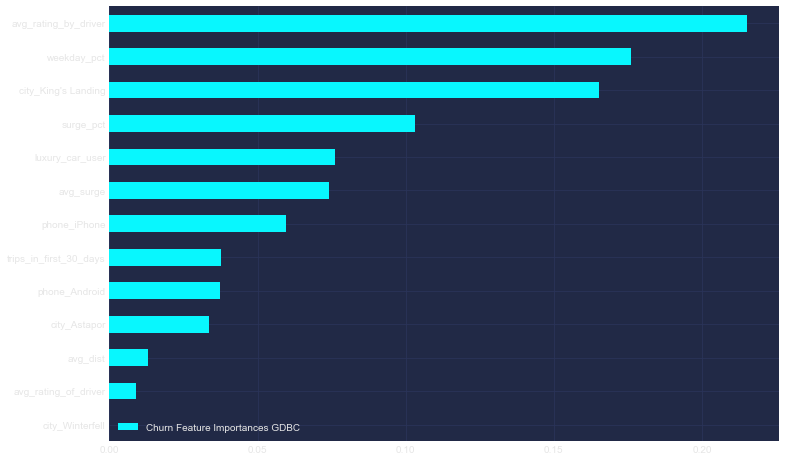

In [18]:
# Feature Importances

# See and plot feature importances 
feat_scores = pd.DataFrame({'Churn Feature Importances GDBC' : model_gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn Feature Importances GDBC')
feat_scores.plot(kind='barh', figsize=(12, 8))

## Sample Tree Plot 

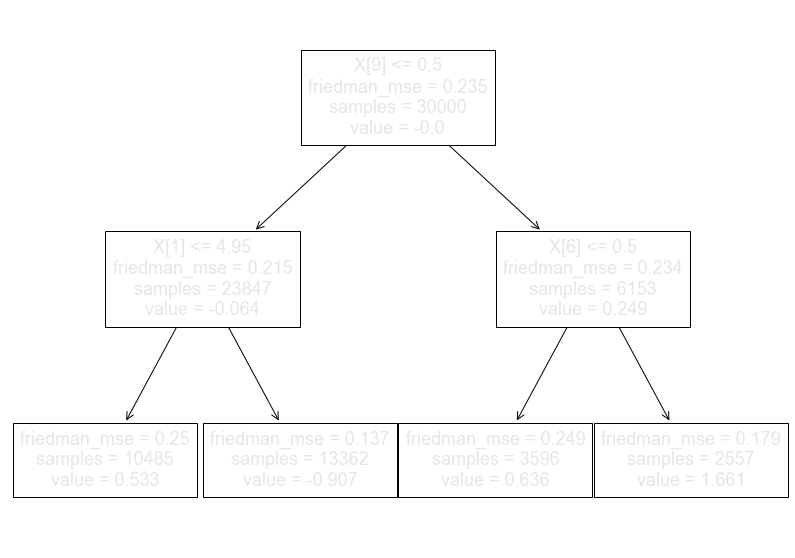

In [19]:
fig, ax = plt.subplots(figsize=(14, 10))
tree_1 = model_gb.estimators_[0][0]
tree_1_plot = plot_tree(tree_1, ax=ax)

## Confusion Matrix

In [20]:
# Confusion Matrix GBC
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, y_pred_gb).flatten()
true_neg, false_pos, false_neg, true_pos

(5396, 861, 1309, 2434)

| -        |       Predicted Negative      |  Predicted Positive |
| ------------- |:-------------:| -----:|
| Actual Negative | 5409 (TN)  | 890 (FP)
| Actual Positive | 1308 (FN) | 2393 (TP)

In [21]:
# Precision GBC
precision = true_pos / (true_pos + false_pos)
precision

0.7386949924127466

In [22]:
# Recall GBC
recall = true_pos / (true_pos + false_neg)
recall

0.6502805236441357

#### Gradient Boosting Peformance

In [24]:
get_score(model_gb, X_train, y_train)

GradientBoostingClassifier     Train CV | MSE: 0.21553333333333335 | R2: 0.08009587193042486 | Acc: 0.7831


(0.21553333333333335, 0.08009587193042486, 0.7831)

### KNN

In [43]:
kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train, y_train)

pred = kn.predict(X_test)

In [85]:
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.5475


### Plotting MSE varying K Neighbors

Text(0.5, 1.0, 'K Neighbors vs MSE')

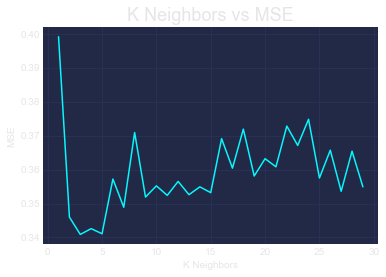

In [90]:
fig, ax = plt.subplots()
mse_k = []
for k in range(1, 30):
    kn = KNeighborsClassifier(n_neighbors=k)
    scaler =MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_k.append(mse)
    
ax.plot(range(1,30), mse_k)
ax.set_xlabel('K Neighbors')
ax.set_ylabel('MSE')
ax.set_title('K Neighbors vs MSE', fontsize=18)

### Plotting Accuracy Score varying K Neighbors(using top 5 important features)

In [91]:
feat = list(feat_scores.index[-5:])

X.loc[:, X.columns.isin(feat)]
X_train, X_test, y_train, y_test = train_test_split(X, y)

Text(0.5, 1.0, 'K Neighbors vs Accuracy Score')

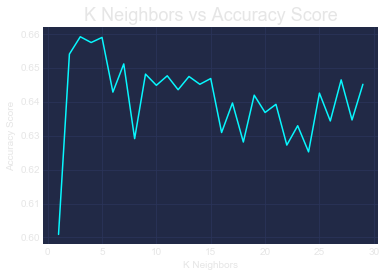

In [89]:
fig, ax = plt.subplots()
accuracy_scores = []
for k in range(1, 30):
    kn = KNeighborsClassifier(n_neighbors=k)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

ax.plot(range(1,30), accuracy_scores)
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('K Neighbors')
ax.set_title('K Neighbors vs Accuracy Score', fontsize=18)

([<matplotlib.patches.Wedge at 0x20a9c118>,
 [Text(6.735557395310444e-17, 1.1, 'Churned'),
  Text(-2.0206672185931328e-16, -1.1, 'Did Not Churn')])

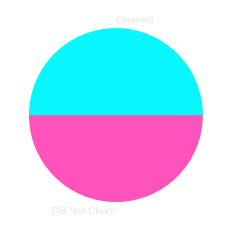

In [114]:
plot_by_churn_labels = (y_train == 1).count()
plot_by_churn_values = (y_train == 0).count()
# plot_data= [
#     go.Pie(labels = plot_by_churn_labels,
#            values = plot_by_churn_values,
#            marker = dict(colors =  [ 'Teal' ,'Grey'],
#                          line = dict(color = "white",
#                                      width =  1.5)),
#            rotation = 90,
#            hoverinfo = "label+value+text",
#            hole = .6)
# ]
# plot_layout = go.Layout(dict(title = "Customer Churn",
#                    plot_bgcolor  = "rgb(243,243,243)",
#                    paper_bgcolor = "rgb(243,243,243)",))
# fig = go.Figure(data=plot_data, layout=plot_layout)
# po.iplot(fig)
label = ['Churned', 'Did Not Churn']
plt.pie([plot_by_churn_labels, plot_by_churn_values], labels=label)